In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
from collections import namedtuple

In [3]:
Walk = namedtuple('Walk', ['Route','Reward'])
np.random.seed =1

class walkGenerator:
    def __init__(self):
        
        #Dictionary to encode state position to a vector
        self.state_arrays = {
                'A':np.array([1,0,0,0,0,0,0]),
                'B':np.array([0,1,0,0,0,0,0]),
                'C':np.array([0,0,1,0,0,0,0]),
                'D':np.array([0,0,0,1,0,0,0]),
                'E':np.array([0,0,0,0,1,0,0]),
                'F':np.array([0,0,0,0,0,1,0]),
                'G':np.array([0,0,0,0,0,0,1])
               }
        #Possible states
        self.states = ('A','B','C','D','E','F','G')

        #state 0 (A) has a reward of 0
        #state 6 (G) has a reward of 1
        self.rewards = {0:0, 6:1}


        #End at state A or G
        self.terminal_states = (0,6)
        
    def take_a_walk(self):
        #initialize empty array to hold the walk progression
        walk = []
        #rewards for the walk
        r = []
        #Always start at position 3 (D)
        current_state = 3
        
        while True:
            #add initial state to walk
            walk.append(self.states[current_state])

            #take a random left or right walk
            action = np.random.choice([-1,1], p=[0.5,0.5])

            #update state position
            current_state = current_state + action

            #check for terminal state
            if current_state in self.terminal_states:
                walk.append(self.states[current_state])
                r.append(self.rewards[current_state])
                break
            else:
                r.append(0)
                
        state_matrix = []

        for position in walk:
            state_matrix.append(self.state_arrays[position])

        state_matrix = np.array(state_matrix)
        
        return Walk(state_matrix, r)
    
    def generate_training_sets(self, num_samples, sequences_per_sample):
        assert isinstance(num_samples, int), 'num_samples param must be integer'
        assert num_samples > 0, 'num_samples param must be greater than 0'
        assert isinstance(sequences_per_sample, int), 'sequences_per_sample param must be integer'
        assert sequences_per_sample > 0, 'sequences_per_sample param must be greater than 0'
        
        training_sets = []
        for i in range(num_samples):
            current_set = []
            for j in range(sequences_per_sample):
                
                walk = self.take_a_walk()
                current_set.append(walk)
                
            training_sets.append(current_set)
        return training_sets

In [231]:
generated_sets = walkGenerator().generate_training_sets(num_samples=100, sequences_per_sample=10)

In [232]:
gamma = 1
alpha=0.1
lamdas=[0.0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
ideal = np.array([(1.0/6.0, (1.0/3.0), (1.0/2.0), (2.0/3.0), (5.0/6.0))])

In [233]:

err = []
for lamda in lamdas:

    rmses =[]

    for set_ in generated_sets:
        values_per_seq = []
        global_values = np.zeros(7)

        next_set = False

        while not next_set:


            for sequence in set_:

                values = global_values.copy()

                eligibility = np.zeros(7)

                walk = sequence.Route
                rewards = sequence.Reward

                for step in range(len(walk)-1):
                    state = np.argmax(walk[step])
                    transition = np.argmax(walk[step+1])
                    eligibility[state] =1
                    update = rewards[step] + gamma*values[transition] - values[state]
                    for pos, val in enumerate(values):
                        values[pos] = val + alpha * update * eligibility[pos]
                        eligibility[pos] = eligibility[pos] * lamda * gamma
                values_per_seq.append(values)

            new_values = np.mean(values_per_seq, axis=0)
            diff = np.abs(new_values - global_values)
            global_values = new_values.copy()
            values_per_seq = []

            if all(diff <= 0.001):
                next_set = True

        rmse = np.sqrt(np.mean((global_values[1:-1]-ideal)**2))

        rmses.append(rmse)
    err.append(np.mean(rmses))

In [182]:
import matplotlib.pyplot as plt

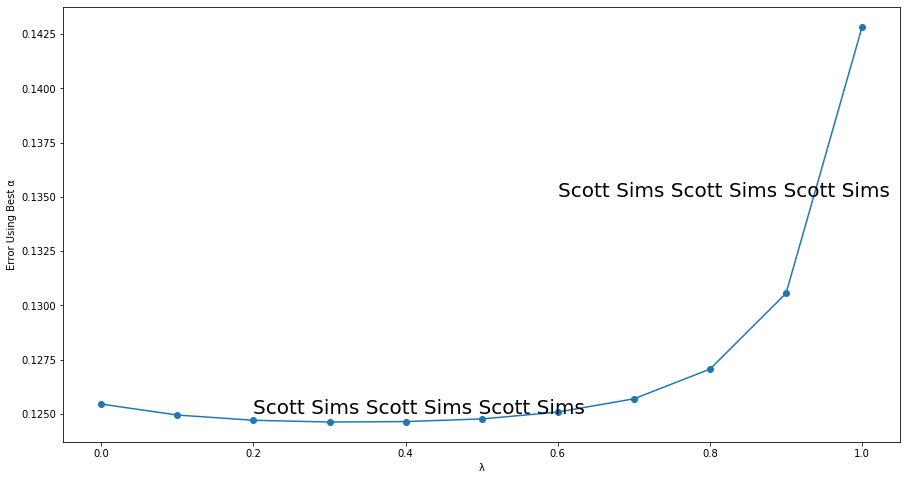

In [236]:
plt.figure(figsize=(15,8))
plt.plot(lamdas, np.mean(errs, axis=0), marker ='o')
plt.ylabel('Error Using Best {}'.format(chr(945)))
plt.xlabel('λ')
plt.text(x = 0.2, y = 0.125,s='Scott Sims Scott Sims Scott Sims', fontsize=20)
plt.text(x = 0.6, y = 0.135,s='Scott Sims Scott Sims Scott Sims', fontsize=20)
plt.show()

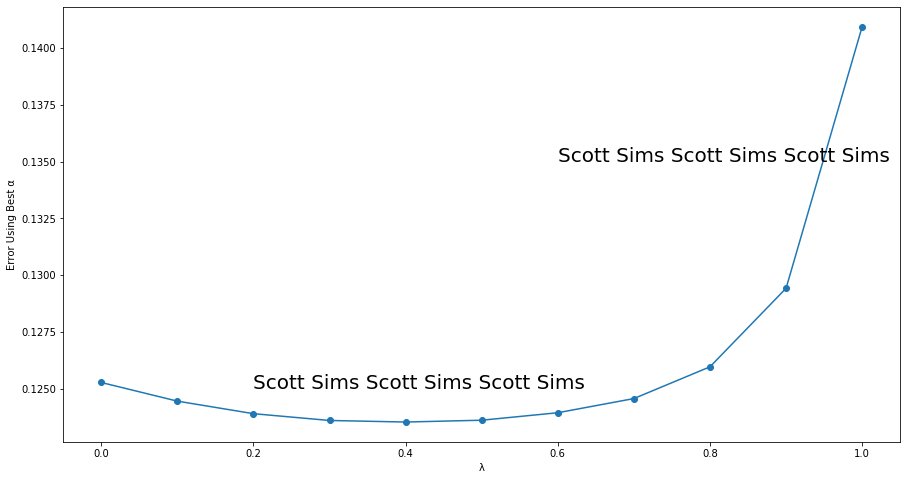

In [270]:
plt.figure(figsize=(15,8))
plt.plot(lamdas, np.mean(rmses, axis=0), marker ='o')
plt.ylabel('Error Using Best {}'.format(chr(945)))
plt.xlabel('λ')
plt.text(x = 0.2, y = 0.125,s='Scott Sims Scott Sims Scott Sims', fontsize=20)
plt.text(x = 0.6, y = 0.135,s='Scott Sims Scott Sims Scott Sims', fontsize=20)
plt.show()

In [ ]:
rmses = []
lambdas = []

In [250]:
training_set = generated_sets[1]

In [271]:
def td_lambda(training_set, alpha, gamma, q):
    lamdas=[0.0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    ideal = np.array([(1.0/6.0, (1.0/3.0), (1.0/2.0), (2.0/3.0), (5.0/6.0))])


    rmses =[]
    for lamda in lamdas:

        

        
        values_per_seq = []
        global_values = np.zeros(7)

        converged = False

        while not converged:


            for sequence in training_set:

                values = global_values.copy()

                eligibility = np.zeros(7)

                walk = sequence.Route
                rewards = sequence.Reward

                for step in range(len(walk)-1):
                    state = np.argmax(walk[step])
                    transition = np.argmax(walk[step+1])
                    eligibility[state] =1
                    update = rewards[step] + gamma*values[transition] - values[state]
                    for pos, val in enumerate(values):
                        values[pos] = val + alpha * update * eligibility[pos]
                        eligibility[pos] = eligibility[pos] * lamda * gamma
                values_per_seq.append(values)

            new_values = np.mean(values_per_seq, axis=0)
            diff = np.abs(new_values - global_values)
            global_values = new_values.copy()
            values_per_seq = []

            if all(diff <= 0.001):
                converged = True

        rmse = np.sqrt(np.mean((global_values[1:-1]-ideal)**2))

        rmses.append(rmse)
    q.put(rmses)

In [255]:
errs = [td_lambda(generated_sets[i], alpha=0.2, gamma=1.0) for i in range(100)]

In [260]:
from multiprocessing import Process, Queue

In [272]:
q = Queue()
processes = []
rmses = []
for i in range(100):
    p = Process(target=td_lambda, args=(generated_sets[i], 0.2, 1.0, q))
    p.start()
    processes.append(p)
for p in processes:
    p.join()
    rmses.append(q.get())

In [273]:
np.mean(rmses, axis=0)

array([0.12527146, 0.12445008, 0.12389751, 0.12359824, 0.12352957,
       0.12360953, 0.12393933, 0.12456313, 0.12596153, 0.12941923,
       0.14094076])